<a href="https://colab.research.google.com/github/THESOLOsquad/QRadders/blob/main/SankeAid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import h5py as h5
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Extracting the train dataset from the h5 file.
f = h5.File("../content/drive/MyDrive/Snake Aid/train_set.hdf5",'r')

print("Stored data:",list(f.keys()))

# Storing the original data "permanently".
images_train_orig = f["images_train"][:]
labels_train_orig = f["labels_train"][:]
f.close()

Stored data: ['images_train', 'labels_train']


In [3]:
images_train_orig[1]

array([[[146, 130, 143],
        [157, 139, 155],
        [154, 136, 150],
        ...,
        [115, 127, 127],
        [115, 134, 138],
        [115, 131, 118]],

       [[142, 129, 149],
        [145, 130, 151],
        [144, 129, 152],
        ...,
        [106, 121, 118],
        [111, 125, 128],
        [111, 131, 129]],

       [[123, 118, 141],
        [115, 105, 132],
        [112, 106, 132],
        ...,
        [109, 124, 129],
        [119, 130, 132],
        [118, 137, 135]],

       ...,

       [[ 50,  52,  49],
        [ 68,  65,  58],
        [ 46,  42,  41],
        ...,
        [192, 175, 181],
        [167, 149, 145],
        [177, 173, 172]],

       [[ 59,  55,  54],
        [ 40,  35,  32],
        [ 39,  35,  36],
        ...,
        [168, 159, 162],
        [188, 173, 170],
        [184, 178, 178]],

       [[ 69,  65,  62],
        [ 65,  58,  52],
        [ 52,  53,  48],
        ...,
        [163, 164, 168],
        [168, 155, 164],
        [146, 130, 140]]

In [4]:
labels_train_orig

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [5]:
print("Train set")
print("Images shape:", images_train_orig.shape)
print("Images dtype:", images_train_orig.dtype)
print("Min, max and mean pixel values:", images_train_orig.min(),"-",
      images_train_orig.max(),"-","{:5.1f}".format(images_train_orig.mean()))
print("Labels shape:", labels_train_orig.shape)
print("Labels dtype:", labels_train_orig.dtype)

Train set
Images shape: (484, 128, 128, 3)
Images dtype: uint8
Min, max and mean pixel values: 0 - 255 - 106.1
Labels shape: (484,)
Labels dtype: uint8


In [6]:


def species(i):
    if i == 1:
        name = "python"
    elif i==0:
        name = "rattlesnake"
    else:
        name = "dunno"
    return name



Label = 0 - A wild rattlesnake appears.


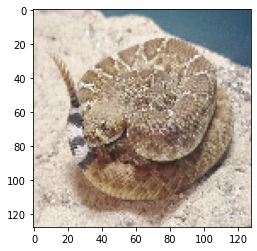

In [7]:
i = 7
print("Label =",labels_train_orig[i],"- A wild", species(labels_train_orig[i]), "appears.")
plt.imshow(images_train_orig[i])
plt.show()

In [8]:
# Copying the original data for manipulation.
images_train = images_train_orig
labels_train = labels_train_orig.reshape([1,len(labels_train_orig)])

In [9]:
# Scaling the data
images_train = images_train/255
images_train = images_train.reshape((len(images_train),-1))
images_train = images_train.transpose()

In [10]:


# Shapes
imsize = images_train.shape[0]
print("Images train shape")
print(images_train.shape)
print(labels_train.shape)



Images train shape
(49152, 484)
(1, 484)


In [11]:


tf.__version__



'2.9.2'

In [12]:


tf.compat.v1.disable_eager_execution()



In [13]:
# Create placeholder for images, call it X.
tf.compat.v1.reset_default_graph()
X = tf.compat.v1.placeholder(tf.float32, shape=(imsize,None))
Y = tf.compat.v1.placeholder(tf.float32,shape=(1,None))

# Create weights and biases. Initialize to zero.
W = tf.compat.v1.get_variable("W", [1,imsize], initializer=tf.zeros_initializer())
b = tf.compat.v1.get_variable("b", [1],initializer=tf.zeros_initializer())

# Make the affine transformation
logits = tf.add(tf.matmul(W,X),b)

# Calculating the cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y,logits=logits))

In [14]:
epochs = 500
alpha = 0.001
# Creating the optimizer

optimizer = tf.compat.v1.train.GradientDescentOptimizer(alpha).minimize(cost)

# Initializing global variables
init = tf.compat.v1.global_variables_initializer()

# Running session
with tf.compat.v1.Session() as sess:
    sess.run(init)
    costs_train = []
#     costs_dev = []
    for epoch in range(epochs):
        _,epoch_cost = sess.run([optimizer,cost],feed_dict={X:images_train,Y:labels_train})
        costs_train.append(epoch_cost)
#         cost_dev = sess.run(cost,feed_dict={X:images_dev,Y:labels_dev})
        print(epoch,epoch_cost)
#         print(epoch,epoch_cost, cost_dev)
#         costs_dev.append(cost_dev)
    Weights, Bias = sess.run([W,b])

0 0.69314724
1 0.6902792
2 0.6877614
3 0.6857187
4 0.68433577
5 0.6840006
6 0.6851643
7 0.6888652
8 0.695748
9 0.7079722
10 0.72431123
11 0.7477323
12 0.768768
13 0.79409367
14 0.8044739
15 0.82069594
16 0.81772155
17 0.82690984
18 0.8180037
19 0.82440716
20 0.8139393
21 0.81931174
22 0.80870223
23 0.813577
24 0.80321515
25 0.8077535
26 0.7977364
27 0.80199677
28 0.7923413
29 0.7963526
30 0.78705287
31 0.79083574
32 0.78187907
33 0.7854506
34 0.77682245
35 0.78019774
36 0.77188313
37 0.77507603
38 0.76705956
39 0.77008283
40 0.7623499
41 0.7652152
42 0.75775146
43 0.7604694
44 0.753261
45 0.7558411
46 0.7488748
47 0.7513258
48 0.7445891
49 0.7469191
50 0.7404001
51 0.74261624
52 0.7363037
53 0.7384125
54 0.7322954
55 0.73430294
56 0.72837144
57 0.7302833
58 0.7245279
59 0.7263487
60 0.72076064
61 0.7224949
62 0.71706575
63 0.71871763
64 0.7134399
65 0.7150131
66 0.70987916
67 0.71137714
68 0.70638037
69 0.7078061
70 0.70294005
71 0.7042964
72 0.69955534
73 0.70084465
74 0.69622296
75 0

Text(0, 0.5, 'Mean log loss')

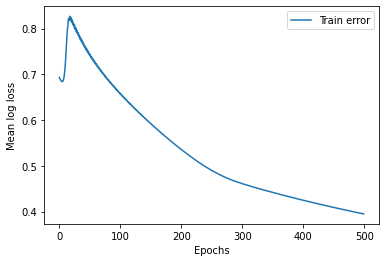

In [15]:
train_curve, = plt.plot(costs_train, label = 'Train error')
# test_curve,  = plt.plot(costs_dev, label = 'Dev error')
# plt.legend(handles=[train_curve,test_curve])
plt.legend(handles=[train_curve])
plt.xlabel('Epochs')
plt.ylabel('Mean log loss')

In [16]:
def predict(x,w,b):
    z = np.dot(w,x)+b
    probs = 1/(1+np.exp(-z))
    y_pred = (probs > 0.5).astype(int)
    return y_pred

In [17]:


def accuracy(label,y_pred):
    acc = np.mean(np.equal(label,y_pred))
    return acc



In [18]:
y_train_pred = predict(images_train,Weights,Bias)

acc = accuracy(labels_train,y_train_pred)

print("Train set accuracy:", acc)

Train set accuracy: 0.9132231404958677


It says it's a python, it's actually a python
Good guess model! Take a cookie.


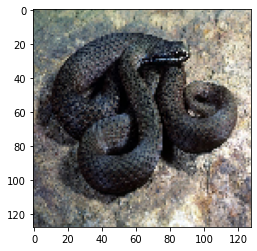

In [19]:


i = 0
sample = images_train[:,i]
target = labels_train[0,i]
prediction = predict(sample,Weights,Bias)
print("It says it's a {}, it's actually a {}".format(species(prediction),species(target)))
print(("Good guess model! Take a cookie." if target == prediction else "Bad model! No cookie for you."))
plt.imshow(images_train_orig[i])
plt.show()



In [20]:
def predictions(i):
    sample = images_train[:,i]
    target = labels_train[0,i]
    prediction = predict(sample,Weights,Bias)
    print("It says it's a {}, it's actually a {}".format(species(prediction),species(target)))
    print(("Good guess model! Take a cookie." if target == prediction else "Bad model! No cookie for you."))
    plt.imshow(images_train_orig[i])
    plt.show()

In [21]:
species(0)

'rattlesnake'

It says it's a python, it's actually a python
Good guess model! Take a cookie.


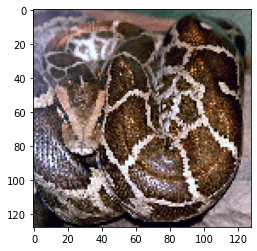

In [22]:
predictions(1)

It says it's a python, it's actually a python
Good guess model! Take a cookie.


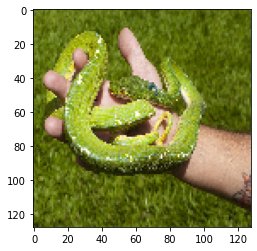

In [23]:
predictions(52)

It says it's a python, it's actually a python
Good guess model! Take a cookie.


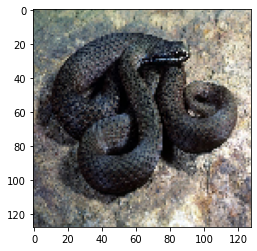

In [24]:
predictions(0)

In [26]:
pip install streamlit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 5.1 MB/s 
     |████████████████████████████████| 164 kB 14.1 MB/s 
     |████████████████████████████████| 237 kB 52.1 MB/s 
     |████████████████████████████████| 78 kB 2.0 MB/s 
     |████████████████████████████████| 4.7 MB 34.2 MB/s 
     |████████████████████████████████| 182 kB 47.7 MB/s 
     |████████████████████████████████| 63 kB 888 kB/s 
     |████████████████████████████████| 51 kB 5.9 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19615 sha256=e8c0defe730c26791a09857e60567d06b06c4e5c0726575e7b9f40331edf5fe0
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


It says it's a python, it's actually a python
Good guess model! Take a cookie.


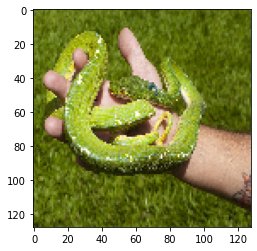

In [25]:
predictions(52)